<a href="https://colab.research.google.com/github/shivxmmm/Machine-learning-/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Linear Regression": LinearRegression(),
    # The alpha parameter controls the strength of this regularization. A value of 1.0 is the default, providing a moderate amount of shrinkage to the coefficients.
    "Ridge Regression": Ridge(alpha=1.0),
    # The random_state=42 ensures reproducibility of the tree's building process, so the same splits are chosen every time the code runs.
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Store results
results = {}

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)



                        MSE       MAE        R2
Linear Regression  0.555892  0.533200  0.575788
Ridge Regression   0.555803  0.533204  0.575855
Decision Tree      0.495235  0.454679  0.622076


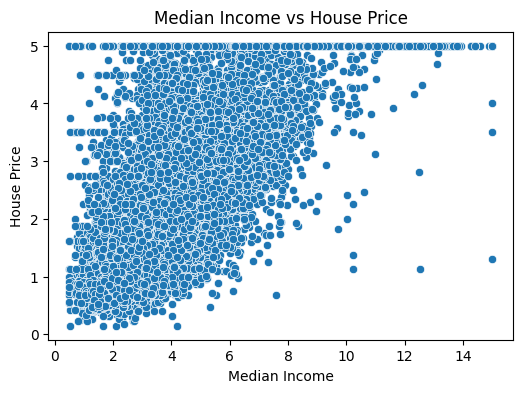

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X['MedInc'], y=y)
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Median Income vs House Price")
plt.show()


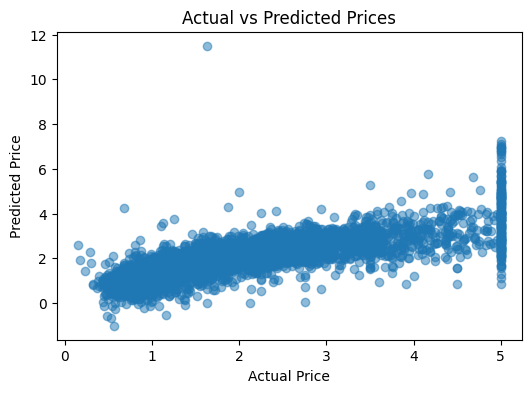

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


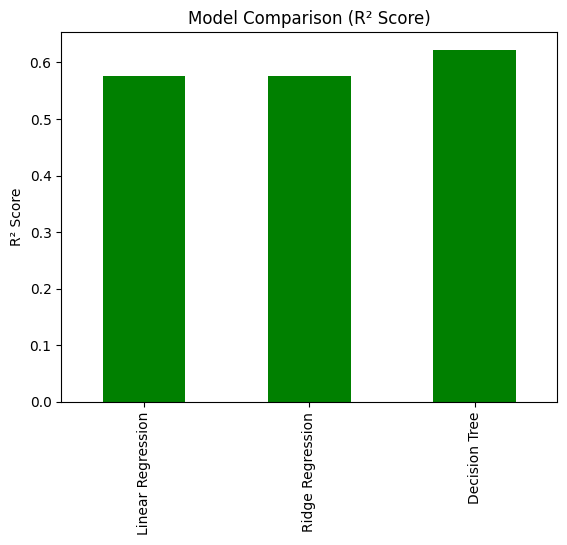

In [ ]:
results_df['R2'].plot(kind='bar', color='green')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()
